In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: March 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Law of Large Numbers

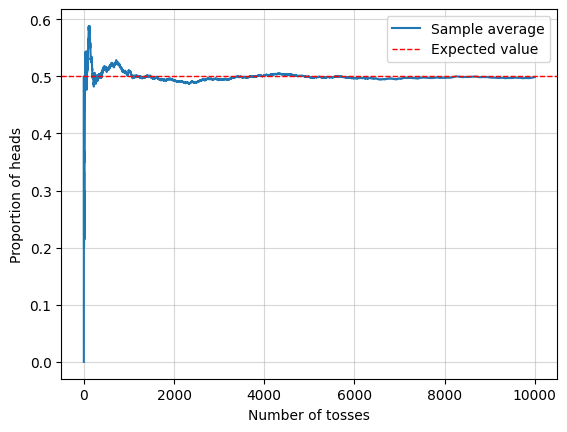

In [3]:
np.random.seed(42)  # for reproducibility

n_trials = 10000
coin_tosses = np.random.randint(0, 2, size=n_trials)
cumulative_average = np.cumsum(coin_tosses) / np.arange(1, n_trials + 1)

plt.plot(cumulative_average, label='Sample average')
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='Expected value')
plt.xlabel('Number of tosses')
plt.ylabel('Proportion of heads')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/lln_demo.pdf')

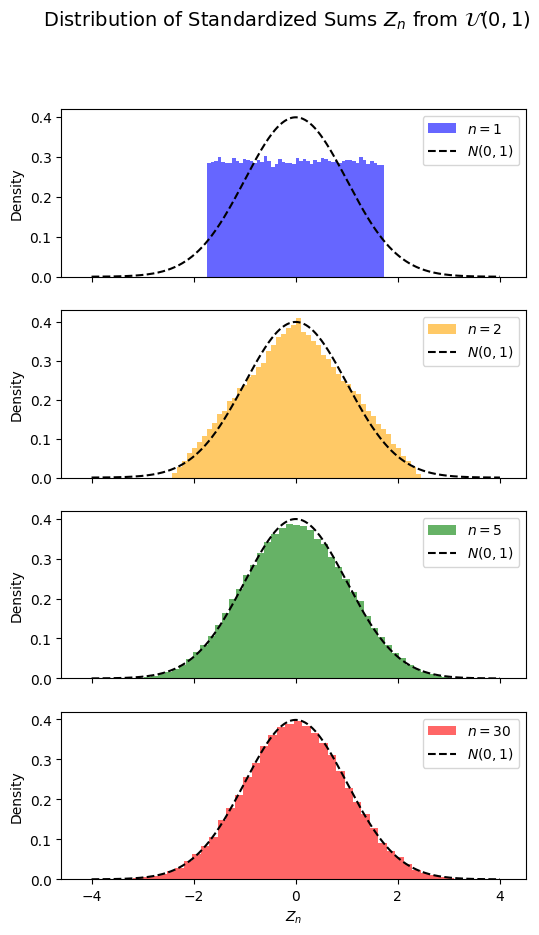

In [4]:
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Sample sizes
n_values = [1, 2, 5, 30]
colors = ['blue', 'orange', 'green', 'red']
x = np.linspace(-4, 4, 500)

# Plot setup
fig, axes = plt.subplots(len(n_values), 1, figsize=(6, 10), sharex=True)
fig.suptitle("Distribution of Standardized Sums $Z_n$ from $\mathcal{U}(0,1)$", fontsize=14)

for i, n in enumerate(n_values):
    samples = np.random.uniform(0, 1, size=(100000, n))
    sums = np.sum(samples, axis=1)
    zn = (sums - n * 0.5) / np.sqrt(n / 12)
    
    axes[i].hist(zn, bins=50, density=True, alpha=0.6, color=colors[i], label=f"$n = {n}$")
    axes[i].plot(x, norm.pdf(x), 'k--', label="$N(0,1)$")
    axes[i].legend(loc='upper right')
    axes[i].set_ylabel("Density")

axes[-1].set_xlabel("$Z_n$")
plt.savefig('figures/clt_demo.pdf')

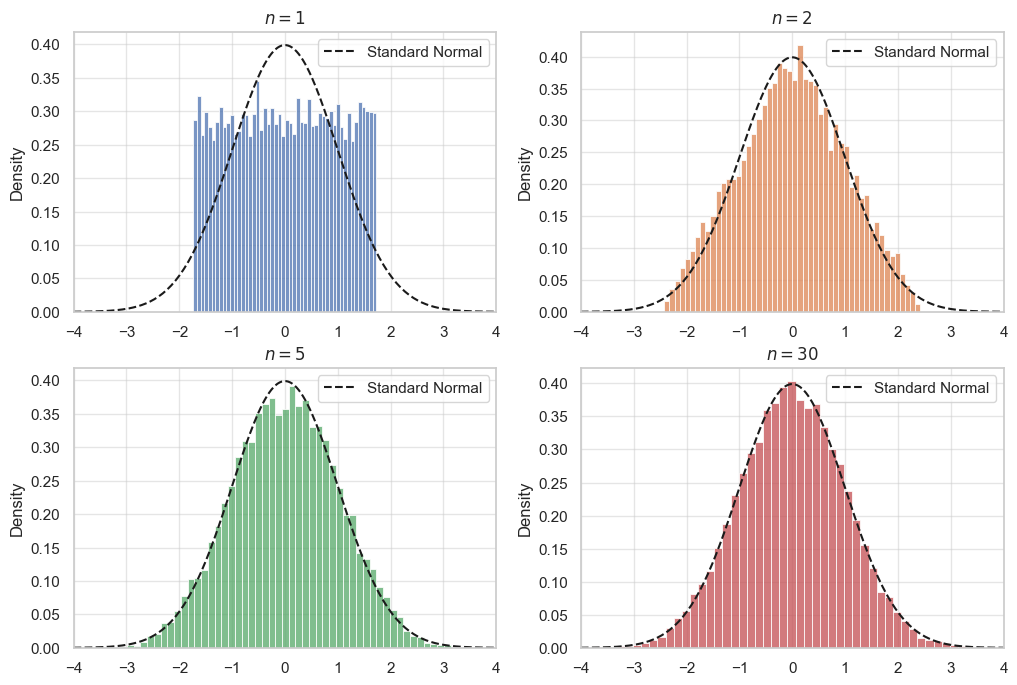

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set style
sns.set(style="whitegrid")

# Parameters
n_values = [1, 2, 5, 30]
samples = 10000
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

x = np.linspace(-4, 4, 200)
normal_pdf = norm.pdf(x)

for i, n in enumerate(n_values):
    data = np.random.uniform(0, 1, size=(samples, n)).sum(axis=1)
    mean = n * 0.5
    std = np.sqrt(n * 1/12)
    standardized = (data - mean) / std
    
    sns.histplot(standardized, bins=50, kde=False, stat="density", ax=axes[i], color=f"C{i}")
    axes[i].plot(x, normal_pdf, 'k--', label='Standard Normal')
    axes[i].set_title(f"$n = {n}$")
    axes[i].legend()
    axes[i].set_xlim(-4, 4)
    axes[i].grid(alpha=0.5)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")

plt.savefig('figures/clt_demo.pdf', bbox_inches='tight')